<a href="https://colab.research.google.com/github/JUCSERahull337/DiabeticRetinopathy/blob/master/DR_BinaryV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import pandas as pd
import cv2
import os
from zipfile import ZipFile
from tqdm import tqdm
import matplotlib.pyplot as plt
from tensorflow.keras.utils import img_to_array
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
from skimage.transform import resize
from imgaug import augmenters as iaa
from tqdm import tqdm
import PIL
from PIL import Image, ImageOps
import cv2
from sklearn.utils import class_weight, shuffle
from keras.losses import binary_crossentropy
from keras.applications.resnet import preprocess_input
import keras.backend as K
import tensorflow as tf
from sklearn.metrics import f1_score, fbeta_score

from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
dataset = []
labels = []
def prepare_Images(label,path):
    img=cv2.imread(path,cv2.IMREAD_COLOR)
    try:
      img_res=cv2.resize(img,(256,256))
      img_array = img_to_array(img_res)
      img_array = img_array/255.0
      dataset.append(img_array)
      if str(label) == '0':
        labels.append('0')
      else:
        labels.append('1')
    except:
      print("error")

In [ ]:
train_Data = pd.read_csv("/content/drive/MyDrive/DDR Dataset/merged.csv")
train_Data.head()

,id_code,diagnosis
0,20170413102628830.jpg,0
1,20170413112017305.jpg,0
2,20170413112528859.jpg,0
3,20170413112758639.jpg,0
4,20170413112758698.jpg,0


In [ ]:
id_code_Data = train_Data['id_code']
diagnosis_Data = train_Data['diagnosis']

In [ ]:
for id_code,diagnosis in tqdm(zip(id_code_Data,diagnosis_Data)):
    path = os.path.join('/content/drive/MyDrive/DDR Dataset/train/','{}'.format(id_code))
    prepare_Images(diagnosis,path)

In [ ]:
images = np.array(dataset)
label_arr = np.array(labels)
print(len(images))
print(len(label_arr))

1333
1333


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(images,label_arr,stratify=label_arr,test_size=0.15,random_state=44)
print("Number of training samples:", x_train.shape[0])
print("Number of training labels:", y_train.shape[0])
print("Number of testing samples:", x_test.shape[0])
print("Number of testing labels:", y_test.shape[0])

Number of training samples: 1133
Number of training labels: 1133
Number of testing samples: 200
Number of testing labels: 200


In [ ]:
y_train= np_utils.to_categorical(y_train, num_classes=2)
y_test = np_utils.to_categorical(y_test, num_classes=2)

In [ ]:
input_shape = (128,256, 256, 3)
n_classes = 2

resnet_model = tf.keras.applications.ResNet50(
    input_shape=(256,256,3),
    include_top=False,
    weights='imagenet'
)

resnet_model.trainable =False

resnet_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
resnettrain = tf.keras.Sequential([
    resnet_model,
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

resnettrain.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 batch_normalization (BatchN  (None, 8, 8, 2048)       8192      
 ormalization)                                                   
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dense (Dense)               (None, 16)                2097168   
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                        

In [ ]:
resnettrain.compile(
    optimizer="adam",
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

In [ ]:
history = resnettrain.fit(
    x_train,
    y_train,
    batch_size=128,
    verbose=1,
    epochs=20

)

Epoch 1/20
9/9 [==============================] - 294s 32s/step - loss: 0.9731 - accuracy: 0.6028
Epoch 2/20
9/9 [==============================] - 298s 33s/step - loss: 0.9275 - accuracy: 0.6161
Epoch 3/20
9/9 [==============================] - 291s 32s/step - loss: 0.8978 - accuracy: 0.6558
Epoch 4/20
9/9 [==============================] - 298s 33s/step - loss: 0.8508 - accuracy: 0.6637
Epoch 5/20
9/9 [==============================] - 305s 34s/step - loss: 0.8216 - accuracy: 0.6805
Epoch 6/20
9/9 [==============================] - 299s 33s/step - loss: 0.7591 - accuracy: 0.7026
Epoch 7/20
9/9 [==============================] - 290s 32s/step - loss: 0.7308 - accuracy: 0.7140
Epoch 8/20
9/9 [==============================] - 296s 33s/step - loss: 0.6946 - accuracy: 0.7387
Epoch 9/20
9/9 [==============================] - 290s 32s/step - loss: 0.6513 - accuracy: 0.7599
Epoch 10/20
9/9 [==============================] - 296s 33s/step - loss: 0.6367 - accuracy: 0.7811
Epoch 11/20
9/9 [==

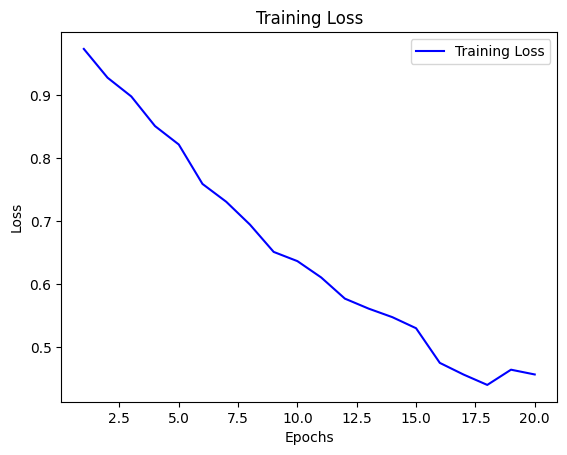

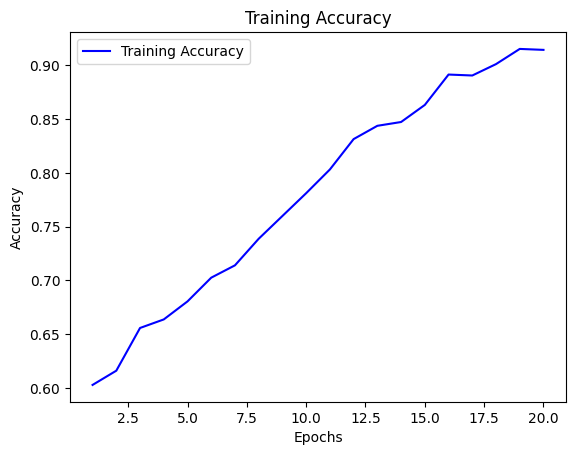

In [ ]:
import matplotlib.pyplot as plt

# Get the training history
loss = history.history['loss']
accuracy = history.history['accuracy']
epochs = range(1, len(loss) + 1)

# Plot the loss graph
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy graph
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
